In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import pandas as pd
import seaborn as sns
import numpy as np
import ast
from wordcloud import WordCloud

import CleanTweets as ct

[nltk_data] Downloading package stopwords to C:\Users\Njabulo
[nltk_data]     Magd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Njabulo
[nltk_data]     Magd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [169]:
import plotly.express as px

In [175]:
def draw_bubble(df, x_name, y_name, name, size_,  weight = 60, 

                height=1200, marker_size=None, xaxis= "influencer"

               , yaxis = 'retweet'):

    """df: output of agg_multi_col_bubbles"""

    """ 

    Weighted net sentiment per topic (Engagement) vs net sentiment per topic.

    Size of bubble is a measure of tweet contribution. 

    

    

    Parameters:

    df

    x_name='net_sent',  y_name='w_sent' 

    net_sentiment(float): Net sentiment per tweet (Previously calculated)

    weighted_sentiment(float): Weighted sentiment per tweet (based on influencer score and retweet count,

                                                             determined by agg_multi_col_bubbles) 

                                                             

 

    Returns:

    Bubble (scatter) graph showing weighted net sentiment (Possible Engagement) vs Net Sentiment per topic.    

    """

  

    fig = px.scatter(df, x=x_name, y=y_name,size=size_,

        hover_name=name, size_max=weight, width=1000, height=height,

                     color_discrete_sequence=px.colors.qualitative.Plotly +

                                             px.colors.qualitative.D3+

                                             px.colors.qualitative.G10+

                                             px.colors.qualitative.T10+

                                             px.colors.qualitative.Pastel,

        labels={

                     x_name: xaxis,

                     y_name: yaxis,

                 },log_y=False)

    #fig.update_layout(showlegend=False)

    

    fig.update_layout(legend=dict(

        orientation="h",

        yanchor="bottom",

        y=1.02,

        xanchor="right",

        x=1

    ))

    fig.update_layout(

                yaxis=dict(

                    title=yaxis,

                    titlefont_size=16,

                    tickfont_size=14,

                ))

    if marker_size is not None:

        fig.update_traces(mode='markers', marker_size=marker_size)

    else:

        fig.update_yaxes(showticklabels=False)

        fig.update_layout(legend_title_text='Cluster')

    fig.update_xaxes()

    fig.show()

In [2]:
benin_clean = pd.read_csv('../data/benin_clean.csv')

## Time/volume tweets - line chart

In [3]:
benin_clean.columns

Index(['Unnamed: 0', '_type', 'url', 'date', 'content', 'renderedContent',
       'id', 'user', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'clean_tweet'],
      dtype='object')

In [4]:
int(benin_clean.date[0][:4])

2021

In [5]:
benin_clean['year'] = benin_clean['date'].apply(lambda x: int(x[:4]))

In [6]:
benin_clean['year'].sample(5)

3153     2019
13890    2019
5510     2016
15843    2017
11083    2021
Name: year, dtype: int64

## Time/volume tweets - line chart

In [7]:
tweetByYear = benin_clean.groupby('year').count().reset_index()

In [8]:
tweetByYear

,year,Unnamed: 0,_type,url,date,content,renderedContent,id,user,replyCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,clean_tweet
0,2016,1090,1090,1090,1090,1090,1090,1090,1090,1090,...,0,25,61,61,204,33,33,264,1,1090
1,2017,1056,1056,1056,1056,1056,1056,1056,1056,1056,...,0,34,81,81,275,23,23,247,0,1056
2,2018,2007,2007,2007,2007,2007,2007,2007,2007,2007,...,0,136,300,300,571,74,74,488,0,2007
3,2019,2179,2179,2179,2179,2179,2179,2179,2179,2179,...,0,92,328,328,662,68,68,975,1,2179
4,2020,3522,3522,3522,3522,3522,3522,3522,3522,3522,...,0,425,911,911,1629,79,79,1008,0,3521
5,2021,6520,6520,6520,6520,6520,6520,6520,6520,6520,...,0,671,994,994,2135,113,113,1669,1,6510


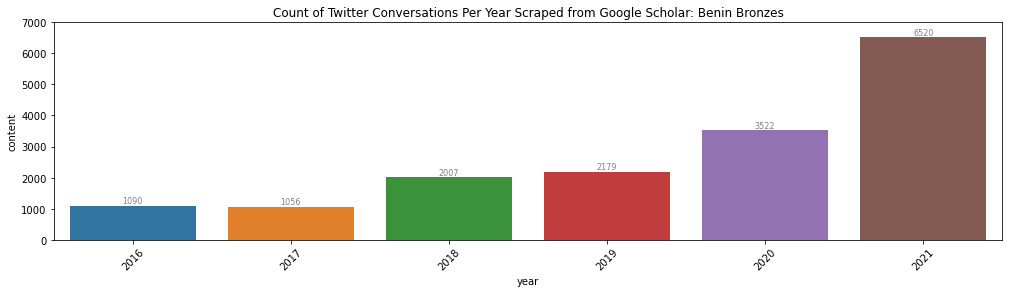

In [9]:
plt.figure(figsize=[17,4])
plt.xticks(rotation=45)
plt.title('Count of Twitter Conversations Per Year Scraped from Google Scholar: Benin Bronzes')
g = sns.barplot(data=tweetByYear, 
             x="year", 
             y="content") 
ax=g
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='gray', xytext=(0, 5),
                textcoords='offset points')
_ = ax.set_ylim(0,7000) #To make space for the annotations62222

## Keywords - Network diagram

In [10]:
benin_clean[benin_clean.clean_tweet == None]

,Unnamed: 0,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,...,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,clean_tweet,year


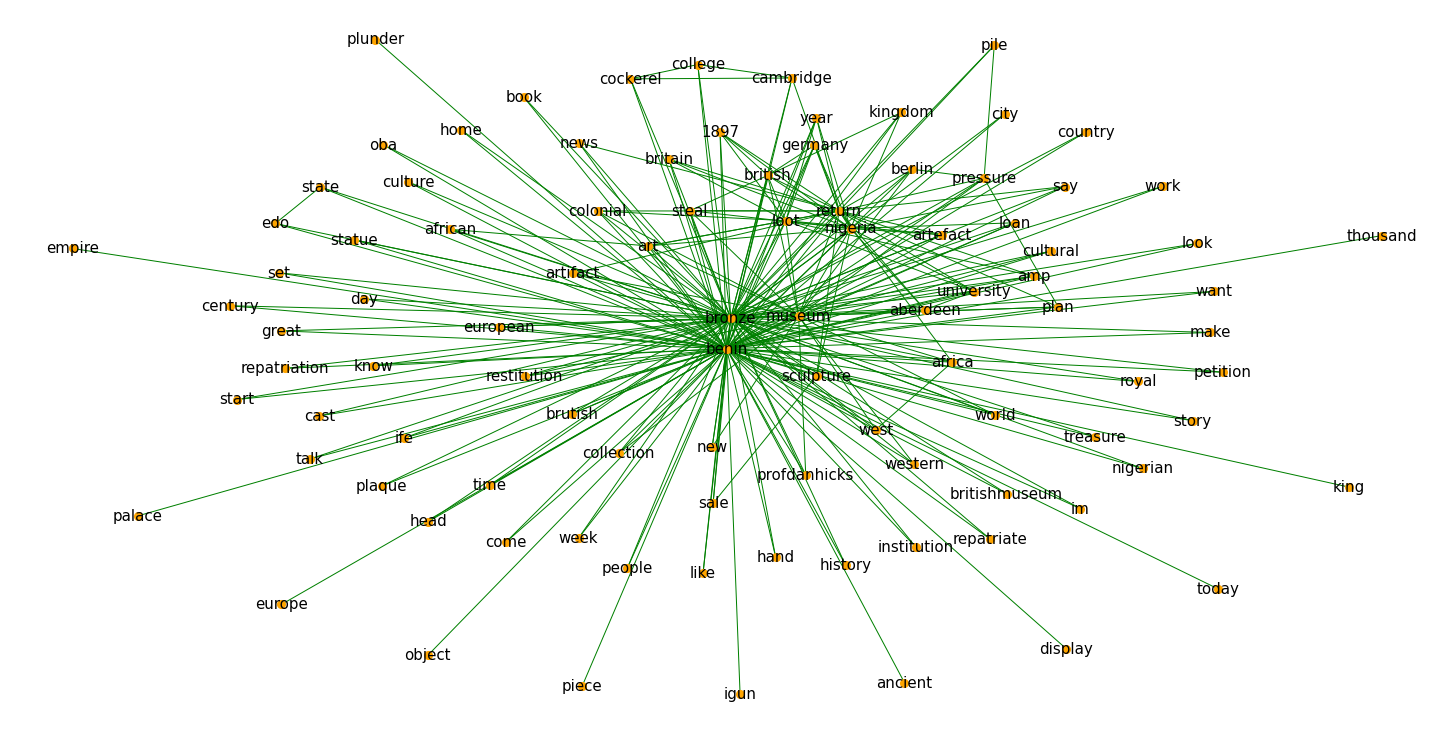

In [13]:
def network_diagram(content_col, filt_val):
    """Draws a network diagram from a given text column
    
        Args:
            :param content_col: Series of strings, column we wish to get a network of.
            :param filt_val: integer, higher numbers filters only on words that have the 
            strongest connection
    """
    
    # You can define your own parameters
    cv = CountVectorizer(ngram_range=(1,1), stop_words = 'english') 
    X = cv.fit_transform(content_col.values.astype('U'))

    # This is the matrix manipulation step
    Xc = (X.T * X) 

    # This are the entity names (i.e. keywords)
    names = cv.get_feature_names() 
    
    # create dataframe of similar names
    df_co = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)

    # put df in workable format
    a = df_co.stack().reset_index()
    a.columns = ['var1', 'var2','value']

    a_filtered=a.loc[ (a['value'] > filt_val) & (a['var1'] != a['var2']) ]


    # Build your graph
    plt.figure(figsize=(20,10))

    G=nx.from_pandas_edgelist(a_filtered, 'var1', 'var2')

    # Plot the network
    nx.draw(G, with_labels=True, node_color='orange', node_size=50, edge_color='green', linewidths=2, font_size=15)

network_diagram(benin_clean.clean_tweet, 260)

## People vs mentions - CSV list, bar chart

In [27]:
import json

In [15]:
benin_clean[['user','mentionedUsers']].sample(10)

,user,mentionedUsers
8390,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u..."
15126,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN
9932,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u..."
6456,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u..."
12000,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN
14729,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN
8380,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u..."
2035,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u..."
9320,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u..."
6891,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN


In [34]:
benin_bronze = pd.read_json('../data/benin-bronze.json', lines=True)
benin_bronzes = pd.read_json('../data/benin-bronzes.json', lines=True)
bb_df = pd.concat([benin_bronze, benin_bronzes])
bb_df.shape

(16374, 28)

In [72]:
def mentions(mentionedUsers):
    mentions = []
    try:
        mentions = []
        for d in mentionedUsers:
            mentions.append(d['username'])
    except TypeError:
        pass
    return mentions
    

In [71]:
bb_df[['mentionedUsers']].iloc[3765]['mentionedUsers']

[{'_type': 'snscrape.modules.twitter.User',
  'username': 'RosemaryOcheze',
  'id': 941309818211577856,
  'displayname': "Oche'ze ( Prof Amaa)",
  'description': None,
  'rawDescription': None,
  'descriptionUrls': None,
  'verified': None,
  'created': None,
  'followersCount': None,
  'friendsCount': None,
  'statusesCount': None,
  'favouritesCount': None,
  'listedCount': None,
  'mediaCount': None,
  'location': None,
  'protected': None,
  'linkUrl': None,
  'linkTcourl': None,
  'profileImageUrl': None,
  'profileBannerUrl': None,
  'url': 'https://twitter.com/RosemaryOcheze'}]

In [73]:
mentions(bb_df[['mentionedUsers']].iloc[3765]['mentionedUsers'])

['RosemaryOcheze']

In [50]:
pd.set_option('display.max_columns', None)  

In [53]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-53-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [40]:
bb_df['username'] = bb_df.user.apply(lambda x: x['username'])

In [75]:
bb_df['mentionedUsers'] = bb_df.mentionedUsers.apply(lambda x: mentions(x))

In [76]:
bb_df.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,username
0,snscrape.modules.twitter.Tweet,https://twitter.com/kibondi/status/1399939533966303240,2021-06-02 04:02:49+00:00,@alaminkimathi Benin Kingdom in Nigeria has kept this tradition going upto date am here and this guys are doing alot including bronze casting https://t.co/mGNNZaTlt7,@alaminkimathi Benin Kingdom in Nigeria has kept this tradition going upto date am here and this guys are doing alot including bronze casting https://t.co/mGNNZaTlt7,1399939533966303240,"{'_type': 'snscrape.modules.twitter.User', 'username': 'kibondi', 'id': 1138214201271422982, 'displayname': 'Kibondi', 'description': 'Human rights activist', 'rawDescription': 'Human rights activist', 'descriptionUrls': None, 'verified': False, 'created': '2019-06-10T22:39:47+00:00', 'followersCount': 26, 'friendsCount': 68, 'statusesCount': 370, 'favouritesCount': 94, 'listedCount': 0, 'mediaCount': 39, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1270801840469356545/OHyykE71_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1138214201271422982/1591817653', 'url': 'https://twitter.com/kibondi'}",0,0,0,0,1399386995919630337,en,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",http://twitter.com/download/android,Twitter for Android,None,None,"[{'_type': 'snscrape.modules.twitter.Photo', 'previewUrl': 'https://pbs.twimg.com/media/E22VlaqWQAIxDF4?format=jpg&name=small', 'fullUrl': 'https://pbs.twimg.com/media/E22VlaqWQAIxDF4?format=jpg&name=large'}]",NaN,None,1.399387e+18,"{'_type': 'snscrape.modules.twitter.User', 'username': 'alaminkimathi', 'id': 470042842, 'displayname': 'UtuNow!', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'url': 'https://twitter.com/alaminkimathi'}",[alaminkimathi],None,None,None,None,kibondi
1,snscrape.modules.twitter.Tweet,https://twitter.com/seethingsista/status/1399831065192108032,2021-06-01 20:51:48+00:00,"I'm hearing today about this Museum repatriation and that Germany and France have decided to return all or some of the bronzes looted from Benin, WHILE Great Britain and the Metropolitan Museum of Modern Art, who also have tons of bronze looted from beanie, have remained silent.","I'm hearing today about this Museum repatriation and that Germany and France have decided to return all or some of the bronzes looted from Benin, WHILE Great Britain and the Metropolitan Museum of Modern Art, who also have tons of bronze looted from beanie, have remained silent.",1399831065192108032,"{'_type': 'snscrape.modules.twitter.User', 'username': 'seethingsista', 'id': 1182499777688166402, 'displayname': 'Wu to the Wei', 'description': 'Choose a self and stand by it -William James. #INTJ', 'rawDescription': 'Choose a self and stand by it -William James. #INTJ', 'descriptionUrls': None, 'verified': False, 'created': '2019-10-11T03:35:04+00:00', 'followersCount': 1429, 'friendsCount': 3191, 'statusesCount': 42042, 'favouritesCount': 96473, 'listedCount': 20, 'mediaCount': 1177, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1371302361151369219/qJJlZROO_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1182499777688166402/1585371457', 'url': 'https://twitter.com/seethingsista'}",1,2,2,0,1399831065192108032,en,"<a h

In [78]:
bb_df[['username', 'mentionedUsers']].to_csv('../data/peopleVmentions.csv')

In [79]:
from collections import Counter

In [88]:
mentionList = list(bb_df['mentionedUsers'])
flat_list = [item for sublist in mentionList for item in sublist]
flat_list[:10]

['alaminkimathi',
 'AtaaOkai',
 'k_colonialism',
 'Nikholisg',
 'bababire',
 'BBCBreaking',
 'britishmuseum',
 'ubud_id',
 '_AcrossTheAges',
 'PiotrPuchalski5']

In [102]:
most_mentioned = dict(Counter(flat_list).most_common(20))
most_mentioned

{'profdanhicks': 608,
 'britishmuseum': 378,
 'YusufTuggar': 199,
 'Etsy': 156,
 'victorsozaboy': 150,
 'YouTube': 146,
 'eBay': 131,
 'hparzinger': 129,
 'BundesKultur': 129,
 'OBAPALACEBENlN': 122,
 'kulturSPK': 102,
 'UKChange': 98,
 'AA_Kultur': 96,
 'BarnabyPhillips': 95,
 'aberdeenuni': 94,
 'DavidOlusoga': 77,
 'GovernorObaseki': 76,
 'AJEnglish': 73,
 'guardian': 71,
 'GermanyDiplo': 69}

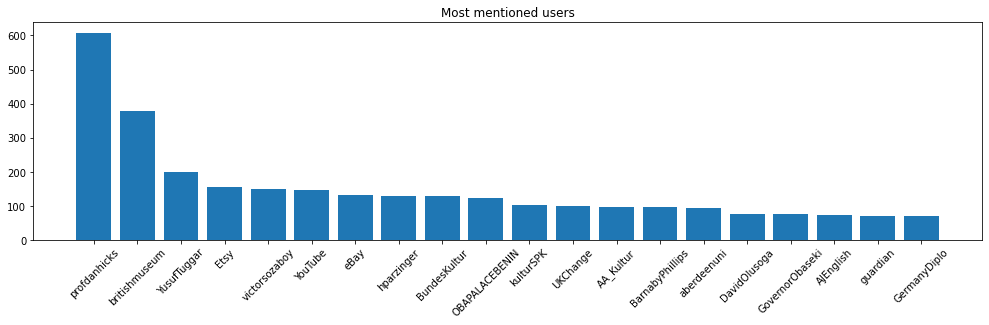

In [110]:
plt.figure(figsize=[17,4])
plt.xticks(rotation=45)
plt.title('Most mentioned users')
g = plt.bar(most_mentioned.keys(), most_mentioned.values())
ax=g

## Geography - map

In [202]:
bb_df.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'username', 'followersCount'],
      dtype='object')

In [227]:
bb_df.coordinates is None

False

In [229]:
loc_bb = bb_df[bb_df.coordinates.isnull() == False]
print(loc_bb.shape)
print(bb_df.shape)

(390, 30)
(16374, 30)


From our list of locations, only 390 have a lattittude and longitude attached. The rest just have country names and states, building a chloropleth from that is a bit tricky.

For now, we will substitute with a simple bar graph with information about the countries in our dataset.

In [232]:
loc_bb['long'] = loc_bb.coordinates.apply(lambda x:x['longitude'])
loc_bb['lat'] = loc_bb.coordinates.apply(lambda x:x['latitude'])

<ipython-input-232-a2c327c26317>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-232-a2c327c26317>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# import plotly.express as px

# fig = px.choropleth(df, geojson=counties, locations='fips', color='unemp',
#                            color_continuous_scale="Viridis",
#                            range_color=(0, 12),
#                            scope="usa",
#                            labels={'unemp':'unemployment rate'}
#                           )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [233]:
bb_df['location'] = bb_df.user.apply(lambda x: x['location'])

In [234]:
has_loc = bb_df[bb_df.location != '']
has_loc.shape

(13051, 31)

In [236]:
s1 = has_loc[has_loc.location.str.contains(',')]
s1['country'] = s1.location.apply(lambda x: x.split(', ')[-1])
s1['no_words'] = s1.country.apply(lambda x: len(x.split()))
s1 = s1[s1.no_words == 1]
s1.shape

<ipython-input-236-6d46060bb0ea>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-236-6d46060bb0ea>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(5159, 33)

Origin of users that post tweets

<AxesSubplot:>

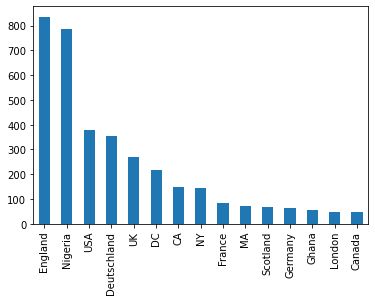

In [237]:
s1['country'].value_counts()[:15].plot(kind="bar")

## User + Retweets + Replies + Followers (agregation) - Top 20 influencers(diagram), all csv 

In [111]:
bb_df.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'username'],
      dtype='object')

In [124]:
bb_df['followersCount'] = bb_df.user.apply(lambda x: x['followersCount'])

In [146]:
topn = bb_df[['username', 'retweetCount', 'replyCount']].groupby('username').sum().sort_values('retweetCount', ascending=False).reset_index()

In [147]:
topn

,username,retweetCount,replyCount
0,profdanhicks,6020,851
1,CNNAfrica,2201,221
2,ajplus,1865,105
3,victorsozaboy,1128,89
4,AfricaFactsZone,1079,213
...,...,...,...
9088,PKewes,0,0
9089,PEACEAFRIKA,0,0
9090,PDCouncil,0,0
9091,PD4Congress,0,0


In [149]:
topInfl = pd.merge(topn, bb_df[['username', 'followersCount']], how='left', on='username').drop_duplicates().groupby('username').mean().round().reset_index().sort_values('retweetCount', ascending=False)

In [150]:
topInfl

,username,retweetCount,replyCount,followersCount
8034,profdanhicks,6020.0,851.0,32030.0
901,CNNAfrica,2201.0,221.0,1313973.0
5174,ajplus,1865.0,105.0,1211040.0
8909,victorsozaboy,1128.0,89.0,11238.0
250,AfricaFactsZone,1079.0,213.0,580769.0
...,...,...,...,...
3580,PKewes,0.0,0.0,536.0
3578,PEACEAFRIKA,0.0,0.0,129.0
3577,PDCouncil,0.0,0.0,5512.0
3576,PD4Congress,0.0,0.0,177.0


In [151]:
topInfl.to_csv('../data/topInfluencers.csv')

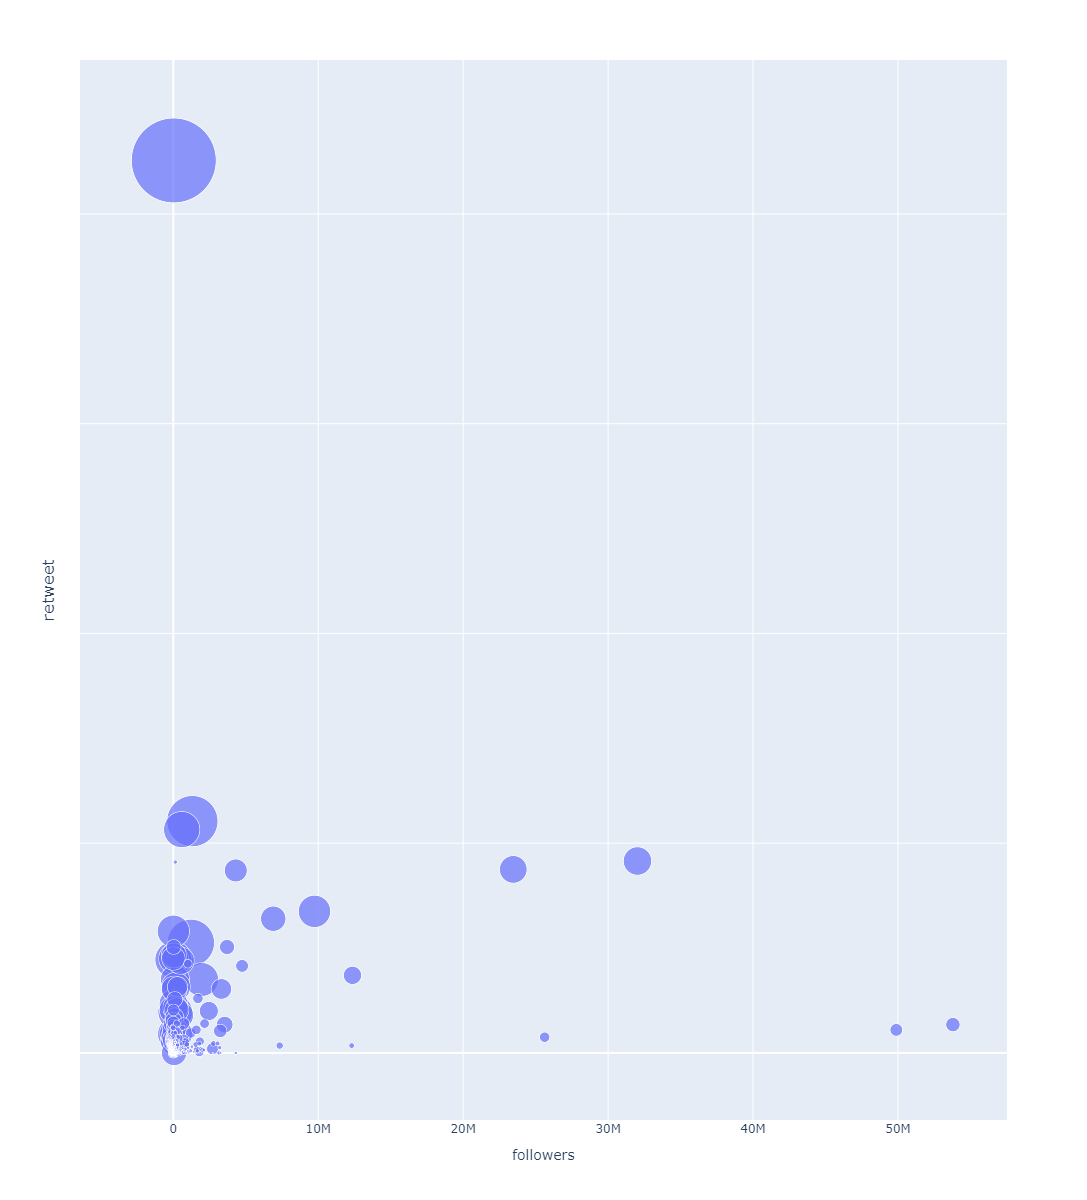

In [184]:
draw_bubble(topInfl, 'followersCount', 'replyCount', 'username', size_ = 'retweetCount',  weight = 60, height=1200, marker_size=None, xaxis= "followers", yaxis = 'retweet')

## Time/volume news 

In [157]:
ggNews = pd.read_csv('../scrape_crawl/bb_google_content172_cleaned.csv')

In [183]:
ggNews.head(1)

,Unnamed: 0,title,link,text,date,html_date,lemma_text,stem_text
0,0,Benin Bronzes: Germany to return looted artefacts to Nigeria ...,https://www.bbc.com/news/world-africa-56949003,"Benin Bronzes: Germany to return looted artefacts to Nigeria\n- Published\nGermany has agreed to return to Nigeria priceless artefacts that were stolen during the colonisation of Africa.\nBritish troops looted thousands of artworks known as the Benin Bronzes from the Kingdom of Benin, in present-day Nigeria, in 1897.\nFollowing auctions, some of the bronzes ended up in museums and private collections across Europe.\nThey hold deep cultural significance, and there is growing international pressure to give them back.\nBerlin's Ethnologisches Museum holds more than 500 artefacts from the Kingdom of Benin, most of them bronzes.\n""We want to contribute to understanding and reconciliation with the descendants of those whose cultural treasures were stolen during colonisation,"" German Culture Minister Monika Gruetters said on Thursday, adding that the first returns were expected to take place in 2022.\nScotland's University of Aberdeen said last month it would repatriate a Benin bronze whose acquisition in 1957 at an auction it called ""extremely immoral"".\nLast year, France approved the restitution of its collection of pillaged Benin Bronzes.\nHundreds of pieces are still held in the British Museum and several museums in the United States.\nThere are plans to house the returned artefacts in the forthcoming Edo Museum of West African Art (EMOWAA). The project is a joint effort between the Nigeria-based Legacy Restoration Trust, the British Museum and architecture firm Adjaye Associates.\nThe Benin Bronzes - thousands of brass, bronze and ivory sculptures and carvings - have become highly charged symbols of colonialism and .\nMore than 900 of these artefacts are housed in the British Museum, which has come under increasing pressure to return them in the wake of last year's Black Lives Matter protests.\nThe British Museum has told the BBC that it is ""committed to facilitating a permanent display of Benin material"" in Edo, but has not specified how many items would be returned, adding ""the selection of objects will be determined through discussion with our Nigerian colleagues"".\nHistorians say Benin City, formerly known as Edo, boasted earthen walls longer than the Great Wall of China.\nIt was also said to be one of the first cities with a form of street lighting.\nBritish troops razed the whole city to the ground in 1897 to avenge the killing of an earlier force.",2021-04-30,2021-04-30,benin bronze germany return loot artefact nigeria publish germany agree return nigeria priceless artefact steal colonisation africa british troop loot thousand artwork know benin bronze kingdom benin present day nigeria 1897 follow auction bronze end museum private collection across europe hold deep cultural significance grow international pressure give back berlin ethnologisches museum hold 500 artefact kingdom benin bronze we want contribute understand reconciliation descendant whose cultural treasure steal colonisation german culture minister monika gruetters say thursday add first return expect take place 2022 scotland university aberdeen say last month would repatriate benin bronze whose acquisition 1957 auction call extremely immoral last year france approve restitution collection pillage benin bronze hundred piece still held british museum several museum united state plan house return artefact forthcoming edo museum west african art emowaa project joint effort nigeria base legacy restoration trust british museum architecture firm adjaye associate benin bronze thousand brass bronze ivory sculpture carving become highly charge symbol colonialism 900 artefact house british museum come increase pressure return wake last year black life matter protest british museum told bbc commit facilitate permanent display benin material edo specify many item would return add the s

In [161]:
withDate = ggNews.dropna()

In [162]:
withDate['year'] = withDate.date.apply(lambda x:x[:4])

<ipython-input-162-7a797caac3f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  withDate['year'] = withDate.date.apply(lambda x:x[:4])


In [163]:
withDate.groupby('year').count()

,Unnamed: 0,title,link,text,date,html_date,lemma_text,stem_text
year,,,,,,,,
2017,1,1,1,1,1,1,1,1
2020,3,3,3,3,3,3,3,3
2021,15,15,15,15,15,15,15,15


## Emotion - Bar chart

In [155]:
ggNews.columns

Index(['Unnamed: 0', 'title', 'link', 'text', 'date', 'html_date',
       'lemma_text', 'stem_text'],
      dtype='object')

In [195]:
gg_clean = ct.clean_tweets(ggNews,content='text',col_name='clean_text',
                general_clean=True,lemma=True,stem=False,remove_tag=True,remove_mention=True,
                remove_emoji=False, remove_stopword=True,min_length=2, untokenized_return=True
                )

time taken to clean tweets: 56.35356569290161s. Use the [clean_text] column to perform your analysis/modeling on


In [179]:
import text2emotion as te

[nltk_data] Downloading package stopwords to C:\Users\Njabulo
[nltk_data]     Magd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Njabulo
[nltk_data]     Magd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Njabulo
[nltk_data]     Magd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [196]:
gg_clean["emotion_dict"] = gg_clean['clean_text'].apply(lambda x: te.get_emotion(x))

In [197]:
gg_clean['emotion_counter'] = gg_clean['emotion_dict'].apply(lambda x: Counter(x))

In [198]:
def normalize(d, target=100):
   raw = sum(d.values())
   factor = target/raw
   return {key:value*factor for key,value in d.items()}

In [199]:
gg_emo_dict= normalize(gg_clean['emotion_counter'].sum())

<BarContainer object of 5 artists>

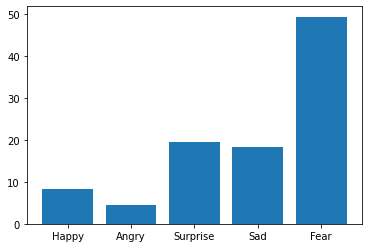

In [192]:
plt.bar(gg_emo_dict.keys(), gg_emo_dict.values())